## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from analysis import LoadData
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

2024-08-19 15:42:31.754643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 15:42:31.765161: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 15:42:31.768334: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-19 15:42:31.775834: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-19 15:42:32.295306: W tensorflow/compiler/tf2

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

I0000 00:00:1724078552.791616   96397 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724078552.815683   96397 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724078552.818812   96397 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## Load data

In [3]:
train_dir = 'data/train/'
val_dir = 'data/val/'
test_dir = 'data/test/'

labels_list_str = ['normal', 'pneumonia']

In [4]:
img_size = 512


x_train, y_train = LoadData(train_dir, labels_list_str, img_size = img_size)
x_val, y_val = LoadData(val_dir, labels_list_str, img_size = img_size)
x_test, y_test = LoadData(test_dir, labels_list_str, img_size = img_size)

data/train/normal
data/train/pneumonia
data/val/normal
data/val/pneumonia
data/test/normal
data/test/pneumonia


## Image preview

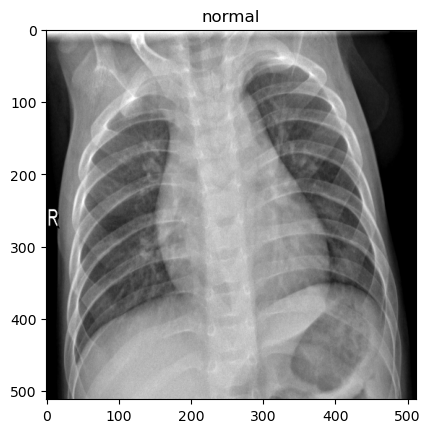

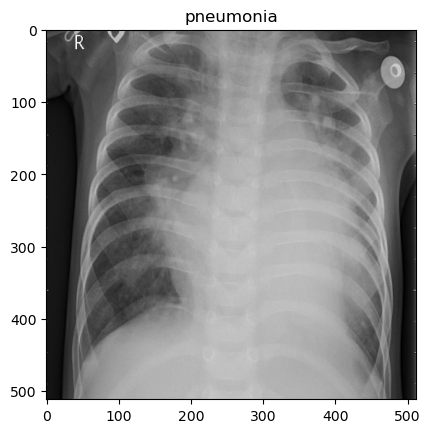

In [5]:
plt.figure()
plt.imshow(x_train[0], cmap = 'gray')
plt.title(labels_list_str[y_train[0]])
plt.show()

plt.figure()
plt.imshow(x_train[-1], cmap = 'gray')
plt.title(labels_list_str[y_train[-1]])
plt.show()

## Data Augmentation

In [6]:
train_datagen = ImageDataGenerator(
    rotation_range = 30,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)
train_datagen.fit(x_train)

## Model

Initial basic CNN model  
CNN1:

In [7]:
# optimizer = Adam(learning_rate=1.e-3)

# model = Sequential()

# model.add(Input(shape=(img_size, img_size, 1)))

# model.add(Conv2D(32,(3,3), activation='relu'))
# model.add(MaxPooling2D((2,2)))

# model.add(Conv2D(64, (3,3), activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

# model.add(Conv2D(128, (3,3), activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

# model.add(Conv2D(128, (3,3), activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

# model.add(Flatten())

# model.add(Dense(512, activation = 'relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1, activation = 'sigmoid'))

# model.compile(optimizer = optimizer,
#               loss = 'binary_crossentropy',
#               metrics = ['accuracy'])

# model.summary()

I0000 00:00:1724072225.683731   76637 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724072225.689031   76637 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724072225.696220   76637 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724072225.809734   76637 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,223,681 (225.92 MB)

 Trainable params: 59,223,681 (225.92 MB)

 Non-trainable params: 0 (0.00 B)

CNN2:

In [7]:
optimizer = Adam(learning_rate=1e-3)

model = Sequential()

model.add(Input(shape=(img_size, img_size, 1)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

I0000 00:00:1724078571.265346   96397 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724078571.269979   96397 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724078571.273412   96397 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724078571.372379   96397 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 510, 510, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 253, 253, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 124, 124, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,225,089 (225.93 MB)

 Trainable params: 59,224,385 (225.92 MB)

 Non-trainable params: 704 (2.75 KB)

In [8]:
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience = 3,
                                 verbose = 1,
                                 factor = 0.3,
                                 min_lr = 1.e-6)

In [9]:
K.clear_session()

In [10]:
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=16),
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks = [lr_reduction] 
)

Epoch 1/200


/home/george/miniconda3/envs/ml_tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1724078575.385536   96556 service.cc:146] XLA service 0x74a084016a30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724078575.385552   96556 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-08-19 15:42:55.428362: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-19 15:42:55.666991: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  1/219 ━━━━━━━━━━━━━━━━━━━━ 29:32 8s/step - accuracy: 0.4375 - loss: 1.4892

I0000 00:00:1724078580.717465   96556 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 ━━━━━━━━━━━━━━━━━━━━ 44s 164ms/step - accuracy: 0.8086 - loss: 4.9379 - val_accuracy: 0.3650 - val_loss: 5.0078 - learning_rate: 0.0010
Epoch 2/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 31s 138ms/step - accuracy: 0.8620 - loss: 0.9681 - val_accuracy: 0.7472 - val_loss: 31.7346 - learning_rate: 0.0010
Epoch 3/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 31s 138ms/step - accuracy: 0.8604 - loss: 0.4251 - val_accuracy: 0.5681 - val_loss: 0.8368 - learning_rate: 0.0010
Epoch 4/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 134ms/step - accuracy: 0.8836 - loss: 0.2831 - val_accuracy: 0.3676 - val_loss: 0.8502 - learning_rate: 0.0010
Epoch 5/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 134ms/step - accuracy: 0.8699 - loss: 0.3245 - val_accuracy: 0.9272 - val_loss: 0.2656 - learning_rate: 0.0010
Epoch 6/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 134ms/step - accuracy: 0.8818 - loss: 0.3192 - val_accuracy: 0.7198 - val_loss: 4.7636 - learning_rate: 0.0010
Epoch 7/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 31s 137ms/step - accuracy: 0.8954 

In [12]:
model.save('CNN2.keras')

In [13]:
import json
with open('history2.json', 'w') as f:
    json.dump(history.history, f)